# Taller Tema 3

## Integrantes

* Francisco Gonzalez
* Bernardo Pinninghoff
* Maximiliano Sepulveda

## Codigo de honor

Este cuaderno ha sido desarrollado por los 3 integrantes del grupo siguiendo el codigo de honor UTFSM.

Imagine que el valor de cierta criptomoneda evoluciona con incrementos diarios independientes de manera que el $i$-ésimo día

\begin{eqnarray}
Z_{i+1} &= \left\{ \begin{array}{rl} 
2\cdot Z_{i} & \mbox{ con probabilidad} \ p\\
1/2 \cdot Z_{i} & \mbox{ con probabilidad} \ 1-p\\
\end{array} \right. \ \ \ \forall i=1,2,\ldots
\end{eqnarray}

Si definimos $Y_i=\log_2(Z_{i+1})$, lo anterior es equivalente a escribir

\begin{eqnarray}
Y_{i+1} & = Y_{i} + X_i \ \ \ \forall i=1,2,\ldots
\end{eqnarray}

donde $X_i$ es una v.a. discreta de Rademacher (que toma el valor $1$ con probabilidad $p$ y el valor $-1$ con probabilidad $1-p$).

Suponga que valor actual de la moneda es $Z_0=1$ (de modo que $Y_0=0$).

# Actividades


1.   Determine los posibles valores de la moneda n días hacia adelante ($Z_n$) y su correspondiente f.d.p. 

2.   Compruebe el resultado anterior vía simulación para n=10 y p=3/5. ¿Cuál es el valor más probable de $Z_n$? ¿Es simétrica la distribución? ¿Qué sucede si p=1/2?

3.   Construya un gráfico para el valor esperado y la varianza del valor que de la moneda durante los primeros 30 días. Compare lo que sucede con p=3/5 y p=1/2. ¿Qué observa? ¿Qué relación existe entre estos valores y los primeros momentos de $Y_n$? 

4.   Use la ley de los grandes números para los estimar los valores esperados y las varianzas de la pregunta anterior mediante simulación. ¿Obtiene buenas aproximaciones de los valores teóricos? ¿De qué depende?

5.   Suponga que cuando vende una moneda debe pagar un impuesto de $I=1.35^n$ donde n es el número de días pasados desde la compra. Si p=3/5, ¿Cuál es la probabilidad de que pierda dinero vendiendo la moneda después del primer mes? ¿Cuál es el valor esperado de la utilidad neta obtenida en este caso? ¿Conviene comprar una moneda si se debe vender después del primer mes? Incluya en su respuesta tanto un razonamiento teórico como estimaciones obtenidas vía simulación. 

6.  Si p=1/2, determine la probabilidad de que durante las primeras dos semanas, se verifique una racha de 5 o más alzas consecutivas. 

7.  Si p=1/2, su amiga Fede le aconseja vender la moneda apenas se verifiquen $5$ alzas consecutivas. Determine la f.d.p. del tiempo que pasará hasta la venta si se usa esta estrategia. Verifique su resultado mediante simulación y use esta última para estimar también la utilidad neta obtenida. 


# Disclaimer

La situación expuesta en este taller no tiene relación oficinal con ninguna criptomoneda y no representa consejo de inversión alguno.

# Desarrollo

Es necesario el uso de algunas librerias para mostrar los datos en gráficos.

In [1]:
# Liberias utiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from glob import glob
import re
import math

## 1.

Primero, podemos ver que los precios de la cryptomoneda siempre cambian dependiendo del dia, aumentando y disminuyendo en multiplos de dos, sin ningun valor intermedio entre cada dia. Entonces se puede decir que estamos enfrentandonos a un caso discreto, no continuo.


Entonces tiene que en n dias, los valores posibles se encuentran entre $(\frac{1}{2})^n$ y $2^n $ (entre n dias de disminucion del valor y n dias de duplicacion del valor).

Dicho esto, se pueden modelar los posibles valores de $Z_{i}$ con la siguiente funcion:

\begin{eqnarray}
h(x)=\frac{2^x}{2^{(n-x)}}, x \in [0, n]
\end{eqnarray}

Donde $X$ es una variable aleatoria discreta de distribucion binomial con parametros $(n,p)$. Aplicando esto a la funcion $h(x)$ a esto, terminamos con la funcion de probabilidad $f(x)$:

\begin{eqnarray}
f(x) = \dbinom{n}{x}p^{x}(1-p)^{n-x}
\end{eqnarray}

Ahora definimos en codigo dos funciones que nos van a permitir calcular los valores posibles de Z y sus probabilidades:

In [2]:
def valores(n): # funcion que calcula los valores de Z en el dia n
    x = 0
    valueList = []
    while x <= n:
        value = (2**x)/(2**(n-x))
        valueList.append(value)
        x += 1
    return valueList

def FDP(n,x,p): # funcion que calcula la probabilidad de los valores de Z segun el dia n y p
    probList = []
    while x <= n:
        prob = math.comb(n,x)*(p**(x))*((1-p)**(n-x))
        probList.append(prob)
        x +=1
    return probList

## 2.

Se define la funcion `bitcoin()` que **retornará el valor final de la moneda al cabo de `n` dias, donde cada dia posee una probabilidad `p` de duplicar su valor, o `p-1` de disminuir a la mitad**.

In [3]:
def bitcoin(n,p):
    prob = int(p * 100)
    z = 1
    repeat = 0
    while repeat < n:
        pRand = np.random.randint(100)
        #print(prob,pRand)

        if pRand <= prob:
            #print("Si, duplicar...")
            z = z*2
        else:
            #print("No, reducir...")
            z = z*0.5
            
        #print(z)
        repeat += 1
    return z

Se simulará el valor de la moneda despues de 10 dias, con una probabilidad de 3/5 de aumentar de precio. Para efectos de probabilidad, se repetirá el experimento 10000 veces.

In [4]:
# Parametros
n   = 10
p   = 3/5
rep = 10000

# Simulacion
exp = []
nExp = 0
while nExp < rep:
    exp.append(bitcoin(n,p))
    nExp += 1

Podemos darnos cuenta que **el valor que más se obtiene en todas las 10000 repeticiones es 4**. Podemos ver que **la distribucion no es simetrica**.

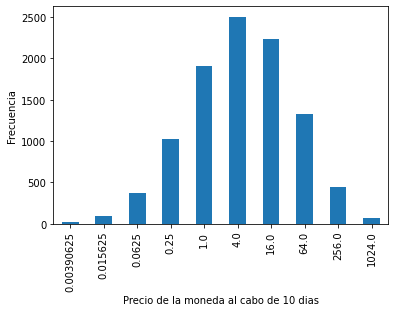

In [5]:
#print(exp)
contar = pd.Series(exp).value_counts().sort_index()
contar.plot(kind='bar')
plt.ylabel('Frecuencia')
plt.xlabel('Precio de la moneda al cabo de 10 dias')
plt.show()

Ahora, se simulará el mismo experimento, pero la probabilidad de que aumente el precio en este caso es 1/2.

In [6]:
# Parametros
n = 10
p = 1/2
rep = 10000

# Simulacion
exp = []
nExp = 0
while nExp < rep:
    exp.append(bitcoin(n,p))
    nExp += 1

Aqui **el valor que más se obtiene en todas las 10000 repeticiones es 1**. Aquí **si se posee una distribucion simetrica**.

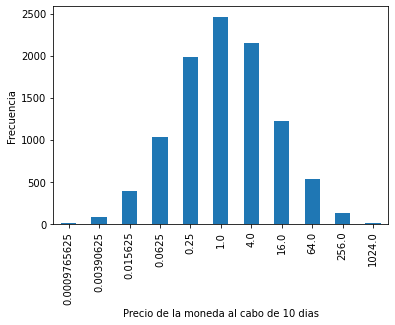

In [7]:
#print(exp)
contar = pd.Series(exp).value_counts().sort_index()
contar.plot(kind='bar')
plt.ylabel('Frecuencia')
plt.xlabel('Precio de la moneda al cabo de 10 dias')
plt.show()

## 3.

Primero, definimos las funciones para calcular los valores esperados y varianzas de cada dia:

In [8]:
def valorEsperado(n,p): # funcion que calcula los valores esperados para n dias
    i = 0
    j = 0
    listE = [] # lista de valores esperados
    while i <= n:
        E = 0
        values = valores(i)
        probs = FDP(i,0,p)
        while j < len(values):
            E += values[j]*probs[j]
            j += 1
        listE.append(E)
        i += 1
    return listE

def varianza(n,p,listE): # funcion que calcula los valores esperados para n dias, requiere lista de valores esperados (listE)
    i = 0
    j = 0
    listV = [] # lista de valores esperados
    while i <= n:
        V = 0
        values = valores(i)
        probs = FDP(i,0,p)
        while j < len(values):
            V += ((values[j]-listE[j])**2)*probs[j]
            j += 1
        listV.append(V)
        i += 1
    return listV

Y ahora graficamos para p = 3/5

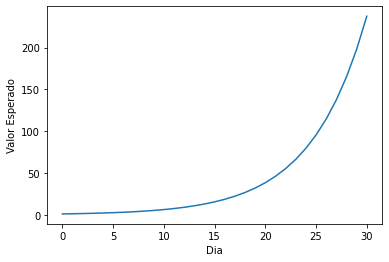

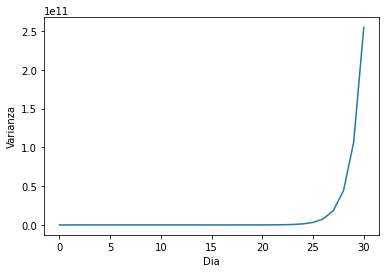

In [9]:
# Parametros
p = 3/5
n = 30

#Calculo
esperanzas = valorEsperado(n,p)
varianzas = varianza(n,p,esperanzas)

#Grafico
grafE = pd.Series(esperanzas)
grafE.plot()
plt.ylabel("Valor Esperado")
plt.xlabel("Dia")
plt.show()

grafV = pd.Series(varianzas)
grafV.plot()
plt.ylabel("Varianza")
plt.xlabel("Dia")
plt.show()

Y ahora para p = 1/2

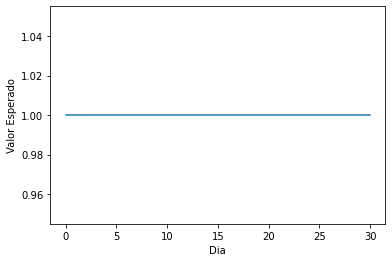

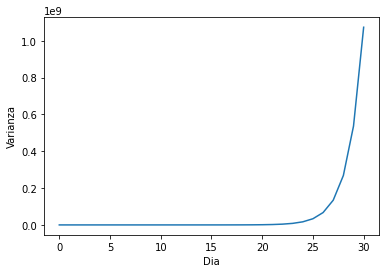

In [10]:
# Parametros
p = 1/2
n = 30

#Calculo
esperanzas = valorEsperado(n,p)
varianzas = varianza(n,p,esperanzas)

#Grafico
grafE = pd.Series(esperanzas)
grafE.plot()
plt.ylabel("Valor Esperado")
plt.xlabel("Dia")
plt.show()

grafV = pd.Series(varianzas)
grafV.plot()
plt.ylabel("Varianza")
plt.xlabel("Dia")
plt.show()

Observamos primero que nada que para p = 1/2, todos los valores esperados quedan en 1. Esto se debe a que el valor de esta cryptomoneda se comporta de manera muy similar a la distribucion binomial, lo que significa que al darle una probabilidad de exactamente 1/2 (o 0.5) se vuelve perfectamente simetrica.

Luego, ante valores mas altos (como p = 3/5) se nota que los valores esperados aumentan exponencialmente a medida que pasan los dias.

Luego, sabemos que $Y_n=\log_2(Z_{n})$, lo que significa que la relacion entre $Y_n$ y $Z_n$ es logaritmica. Esto deberia conservarse para sus momentos. Entonces como los momentos de $Z_n$ se comportan exponencialmente, los de $Y_n$ deberian comportarse de manera lineal a la hora de aplicar la relacion logaritmica entre $Y_n$ y $Z_n$.

## 4.

In [11]:
# Parametros
n   = 30
p   = 3/5
rep = 10000

# Simulacion
exp = []
nExp = 0
while nExp < rep:
    exp.append(bitcoin(n,p))
    nExp += 1

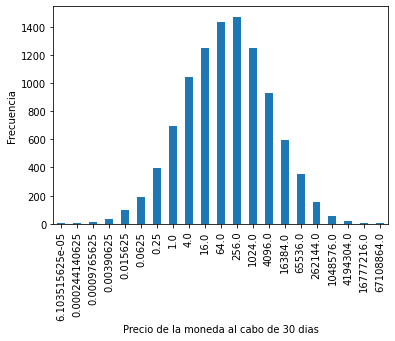

Esperanza: 42258.34198826904


In [12]:
#print(exp)
contar = pd.Series(exp).value_counts().sort_index()
contar.plot(kind='bar')
plt.ylabel('Frecuencia')
plt.xlabel('Precio de la moneda al cabo de 30 dias')
plt.show()

valores = list(dict(contar).keys())
probab = list(contar)

E = 0
i = 0
while i < len(valores):
    #print(valores[i], (probab[i]/rep))
    E += valores[i]*(probab[i]/rep)
    i += 1
    
print("Esperanza: " + str(E))

In [13]:
# Parametros
n   = 30
p   = 1/2
rep = 10000

# Simulacion
exp = []
nExp = 0
while nExp < rep:
    exp.append(bitcoin(n,p))
    nExp += 1

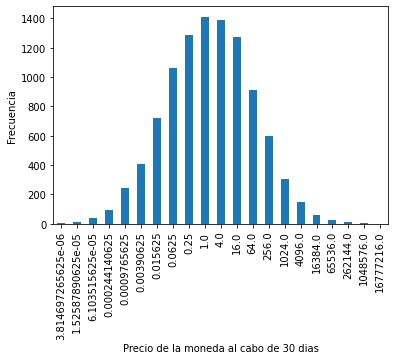

Esperanza: 2518.5166100112915


In [14]:
#print(exp)
contar = pd.Series(exp).value_counts().sort_index()
contar.plot(kind='bar')
plt.ylabel('Frecuencia')
plt.xlabel('Precio de la moneda al cabo de 30 dias')
plt.show()

valores = list(dict(contar).keys())
probab = list(contar)

E = 0
i = 0
while i < len(valores):
    #print(valores[i], (probab[i]/rep))
    E += valores[i]*(probab[i]/rep)
    i += 1
    
print("Esperanza: " + str(E))

## 5.

Se define la funcion `bitcoinImpuesto()`, siendo similar a la funcion `bitcoin()`, con la diferencia que **al final se descuenta el impuesto de venta `i` que se pagaría al vender la moneda a los `n` dias**.

In [15]:
def bitcoinImpuesto(n,p,i):
    prob = int(p * 100)
    z = 1
    repeat = 0
    while repeat < n:
        pRand = np.random.randint(100)
        #print(prob,pRand)

        if pRand <= prob:
            #print("Si, duplicar...")
            z = z*2
        else:
            #print("No, reducir...")
            z = z*0.5
            
        #print(z)
        repeat += 1
    return z - i**n

Se simula  la moneda a 30 dias con una probabilidad de 3/5 de duplicar su valor, y un impuesto de venta de $1.35^n$. Este experimento se repite 10000 veces.

In [16]:
# Parametros
n = 30
p = 3/5
i = 1.35
rep = 10000

# Simulacion
positivos = 0
exp = []
nExp = 0
while nExp < rep:
    expActual = bitcoinImpuesto(n,p,i)
    exp.append(expActual)
    if expActual > 0:
        positivos += 1
    nExp += 1

Las ganancias se distribuyen binomialmente; de los 10000 intentos, solo 1115 han obtenido ganancias, y el resto han tenido perdidas; es decir **la probabilidad de perder dinero vendiendo la moneda al mes es de 0.90 aproximadamente**.

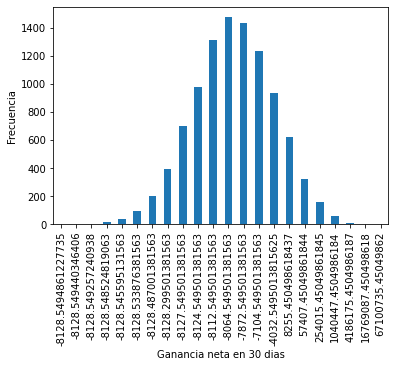

Ganancias positivas: 1172
Probabilidad de perder dinero: 0.8828


In [17]:
contar = pd.Series(exp).value_counts().sort_index()
contar.plot(kind='bar')
plt.ylabel('Frecuencia')
plt.xlabel('Ganancia neta en 30 dias')
plt.show()
print("Ganancias positivas: " + str(positivos))
print("Probabilidad de perder dinero: " + str((rep-positivos)/rep))

A pesar de que el valor esperado es relativamente alto, hay que recordar que es un equivalente a un promedio, por lo tanto, es sensible a extremos.

In [18]:
val = list(dict(contar).keys())
con = list(contar)
espect = 0

#print(val)
#print(con)

#print(contar)
for x in range(len(val)):
    #print(val[x],con[x]/rep)
    espect += val[x] * (con[x]/rep)
    
print("Valor esperado: " + str(espect))

Valor esperado: 22053.377313402678


**Se puede concluir que no conviene vender la moneda a final de mes**, pues hay una muy alta probabilidad de terminar con perdidas. A pesar de que hay valores de ganancia maxima muy altas, como tambien minimos muy bajos, estos poseen poca probabilidad de ocurrir, sin embargo, afectan al valor esperado.

## 6.

Se define la funcion `bitcoinAlza()`, similar a `bitcoin()`, pero en esta ocasion, **la funcion retorna 1 cuando se presentan 5 alzas consecutivas entre los `n` dias**.

In [19]:
def bitcoinAlza(n,p):
    prob = int(p * 100)
    alza = 0
    repeat = 0
    while repeat < n:
        pRand = np.random.randint(100)
        #print(prob,pRand)

        if pRand <= prob:
            #print("Si, duplicar...")
            alza += 1
        else:
            #print("No, reducir...")
            alza = 0 # Reiniciar contador
            
        #print(z)
        if alza == 5:
            return 1
            
        repeat += 1
    return 0

Con lo anterior, se realiza el experimento con 14 dias (2 semanas) y una probabilidad de 1/2 en duplicar su valor, repitiendose 10000 veces. Cada vez que ocurran 5 alzas consecutivas, el contador `alzas` aumenta.

In [20]:
# Parametros
n = 14
p = 1/2
alzas = 0
rep = 10000

# Simulacion
for x in range(rep):
    alzas += bitcoinAlza(n,p)

Se obtiene el numero de ocurrencias, respecto a la cantidad total de intentos que se realizó el experimento, **obteniendose una probabilidad de aproximadamente 0.18**.

In [21]:
print("Numero de ocurrencias: " + str(alzas))
print("Probabilidad: " + str(alzas/rep))

Numero de ocurrencias: 1844
Probabilidad: 0.1844


## 7.

Se define la función `bitcoinTiempo()`, similar a `bitcoinAlza()`, pero en esta ocasión **se retorna la cantidad de dias que se tarda hasta obtener 5 dias consecutivos de alza**.

In [22]:
def bitcoinTiempo(p):
    prob = int(p * 100)
    dias = 0
    alza = 0
    while alza != 5:
        pRand = np.random.randint(100)
        #print(prob,pRand)

        if pRand <= prob:
            #print("Si, duplicar...")
            alza += 1
        else:
            #print("No, reducir...")
            alza = 0 # Reiniciar contador
            
        dias += 1
    return dias

El experimento se repite 10000 veces con una probabilidad de alza de 1/2.

In [23]:
# Parametros
p = 1/2
rep = 100000

# Simulacion
exp = []
nExp = 0
while nExp < rep:
    exp.append(bitcoinTiempo(p))
    nExp += 1

Se puede ver que generalmente se tarda alrededor de 15 dias en obtener un alza de 5 dias consecutivos.

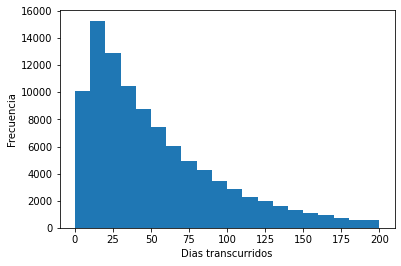

In [24]:
contar = pd.Series(exp)
contar.plot(kind='hist',bins=20,range=(0,200))
plt.ylabel('Frecuencia')
plt.xlabel('Dias transcurridos')
plt.show()

A continuación, se define la función `bitcoinTiempoGanancia()`, similar a `bitcoinTiempo()`, pero en esta ocasión **se retorna el valor de la moneda, junto al impuesto de venta que se debe pagar por los dias que han transcurrido hasta las 5 alzas consecutivas**.

In [25]:
def bitcoinTiempoGanancia(p,i):
    prob = int(p * 100)
    dias = 0
    alza = 0
    z = 1
    while alza != 5:
        pRand = np.random.randint(100)
        #print(prob,pRand)

        if pRand <= prob:
            #print("Si, duplicar...")
            alza += 1
            z = z*2
        else:
            #print("No, reducir...")
            alza = 0 # Reiniciar contador
            z = z*0.5
            
        dias += 1
    return z - i**dias

El experimento se repite 10000 veces con una probabilidad de alza de 1/2, con el mismo impuesto ingresado anteriormente.

In [26]:
# Parametros
p = 1/2
i = 1.35
rep = 100000

# Simulacion
exp = []
nExp = 0
while nExp < rep:
    exp.append(bitcoinTiempoGanancia(p,i))
    #print("Exp #" + str(nExp))
    nExp += 1

Se puede observar que la utilidad neta utilizando la estrategia de esperar 5 alzas consecutivas es alrededor de 0, tendiendo a perdidas.

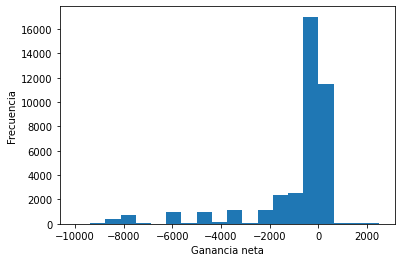

In [27]:
contar = pd.Series(exp)
contar.plot(kind='hist',bins=20,range=(-10000,2500))
plt.ylabel('Frecuencia')
plt.xlabel('Ganancia neta')
plt.show()